# 1 Author

**Student Name**:  Diba Hadji Kazemi

**Student ID**:  230516614


# 2 Problem formulation

**Describe the machine learning problem that you want to solve and explain what's interesting about it.**

In this project I aimed to predict whether a dish is Italian, American or Chinese based on the ingredients used in it.

For me this problem is exciting because I really like american, italian and chinese food and this can help me choose what cuisine to choose based on the ingredients I have.

Moreover, as a student in ECS7020P student, it feels nice to train a model on a dataset that I also participated in the data gathering process.

# 3 Machine Learning pipeline

**Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and format of the intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.**



the input of this pipeline is a list of ingredients. Bear in mind that it should only contain the name of the ingredients and no numeric value. at first, the ingredients will be matched to the list of ingredients used for creating the model if the ingredient used in the dish is also in the list of ingredients used in training, 1 will be put in the respective column to indicate its presence. the resulting data frame will be used to predict the cuisine's origin.

- Transformation
  - By identifying mutual ingredients (features) between the ingredients data frame and the input a data frame is created.
    - The columns of this data frame consist of the same ingredients (features) that have been used for training the data
    - If the ingredient is also present in the input list the value given to that cell will be one, if not zero.
2. Model
- the chosen model will be used for prediction in this part.

The function below can be used to identify the cuisine origin of the dish and a list should be given to it as an input at the end of this code this function will be used.


In [57]:
def cuisine_predict(ingredients:list, model):
  x = pd.DataFrame(columns= df.columns)
  for ing in ingredients:
    if ing in df.columns:
      x.loc[0,ing] = 1
  x.fillna(0, inplace=True)
  y = model.predict(x)

  print('The possible diet for this dish is {}'.format(encoded_to_original[y[0]]))

# 4 Transformation stage

**Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.**

for transforming the dataset to extract the useful features the following steps have been taken:

- creating a data frame which its indices are the same as the data frame produced at the preprocessing stage.
  - the columns of this data frame are all the ingredients used in the data set
  - when a dish has that ingredient the respective cell will get the value of 1 if not it will have 0. For example, if dish 10 has an egg in it the value of the df[10th row, egg column]=1
- in order to choose the ingredients that have the highest frequency in dishes, the dataset has been sorted, then the first 50 columns have been selected. These 50 columns are the most used ingredients in the dishes.

# 5 Modelling

**Describe the ML model(s) that you will build. Explain why you have chosen them.**

5 classifiers have been chosen for this problem. Since in this problem we are predicting the Cuisine of the dishes, it is a classification problem. The following classifiers have been used in this project
- Gradient Boosting classifier
- SVM
- Decision trees
- Linear support vector classification
- random forest classifier
- K nearest neighbors
- Logistic Regression

# 6 Methodology

**Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)**


In this project accuracy and confusion matrix have been used as a measure to choose the best fitting model.

The reason these two have been chosen is that when data is skewed accuracy may not be enough to choose the best-fitting model. In those cases, confusion matrix can help us have a better understanding of the model's performance.

# 7 Dataset

**Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.**
The dataset proposed in this project has so many features but for the purpose of this project, the features of this dataset will be used to train the model. The ingredients and Cuisine features will be used to train and evaluate the data.

the stages of preparing this dataset for this project has been stated below.
- download data from the drive/ import
- By going through the dataset I noticed that there was some inconsistency with the ingredients, and in some cases, the amount of each ingredient was also stated. First I pruned the instances where there were numbers in the ingredients feature.
- Some dishes don't have enough ingredients and these cases will not provide enough information about the dish, therefore dishes with less than 5 ingredients have been omitted from the dataset.
- Since we want to use this dataset to predict whether the dish is Italian, chinese, or American we only need dishes that are from these three sets therefore we omit the rest.

in the following couple of lines early stages of importing our database and required libraries have been done. The database is located on google drive and by using these codes it has been imported into this platform.

In [58]:
!pip install mlend

In [59]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski
from sklearn.preprocessing import LabelEncoder

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import seaborn as sns
from sklearn.metrics import confusion_matrix

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
# baseDir
# os.listdir(baseDir)

train and test datasets have been seperated using the benchmark feature. As mentioned above the feature that we want to predict is the healthiness rating

In [61]:
df_org = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')

## Preprocessing

In this stage we are cleaning our database by getting rid of data that contain numbers. In this problem we don't want the amount of each ingredient so we drop the rows which have numbers. Moreover, for increasing the accuracy of the model we want dishes which have a minimum amount of ingredients therefore we drop any row that doesn't have at least 5 ingredients.

In [62]:
def contains_numbers(s):
    return bool(re.search(r'\d', s))

# Filtering rows where 'Ingredients' contains numbers
df_org = df_org[~df_org['Ingredients'].apply(lambda x: contains_numbers(x))]

# Filtering rows where 'Ingredients' has less than 5 items
def min_ingredients_prune(I):
  return len(I) < 5
df_org['Ingredients'] = df_org['Ingredients'].str.split(',')
df_org = df_org[~df_org['Ingredients'].apply(lambda x: min_ingredients_prune(x))]
df_org.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"[eggs, bacon, hash_brown, tomato, bread, tomat...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"[chili, chicken, peanuts, sihuan_peppercorns, ...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"[sugar, water, khoya, milk, salt, oil, cardamo...",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"[chicken, lemon, turmeric, garam_masala, coria...",healthy,4.0,strongly_like,5.0,Train
000006.jpg,non_vegetarian,european,european,chocolate_mousse_portion,home,"[gelatine_leaf, dark_chocolate, milk_chocolate...",unhealthy,2.0,strongly_like,5.0,Test


After that the target rows containing dishes from chinese, american and italian cuisines are collected, furthermore, the dataset will be divided to train and test datasets.

For creating the Y data, first, the cuisine names will be encoded and the encoding map will be used to further inverse the results of the model to get the name of the cuisine.

In [63]:
index_list = ['italian', 'chinese', 'american']
df_org = df_org[df_org['Cuisine'].isin(index_list)]

train = df_org[df_org['Benchmark_A']=='Train']
test = df_org[df_org['Benchmark_A']=='Test']

label = LabelEncoder()
original_labels = index_list
label.fit(original_labels)
encoded_labels = label.transform(original_labels)

encoded_to_original = {encoded: original for encoded, original in zip(encoded_labels, original_labels)}
Y_train = label.transform(train['Cuisine'])
Y_test = label.transform(test['Cuisine'])

reverse_mapping = {label: train['Cuisine'] for label, original_label in zip(encoded_labels, original_labels)}
reversed_labels = [reverse_mapping[label] for label in encoded_labels]

## Transformation

Now for starting our training process a new data frame will be created for the dishes where the index will be the same as the original data frame and the columns of it will be the ingredients.

In [64]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
df = pd.DataFrame(index=df_org.index)
for idx in df.index:
  for ing in df_org.loc[idx, 'Ingredients']:
    df.loc[idx, ing] = 1
df.fillna(0, inplace=True)

For finding our training dataset ingredients, first we seperate our data into train and test. Then the first 20 most used ingredients in the training dataset will be chosen for training the model.

In [65]:
df_train = df.loc[train.index,:]
df_test = df.loc[test.index,:]
X_train_fn = df_train
X_test_fn = df_test

df_train.head()

,chili,chicken,peanuts,sihuan_peppercorns,green_onions,peanut_oil,sugar,cocoa_powder,salt,milk,...,chopped_onions,tomato_and_basil_sauce,sour_dough,chichen_breast,split_yellow_mung_beans,asafoetida,rosemary_leaf,beef_stock_cube,_onion,chive
filename,,,,,,,,,,,,,,,,,,,,,
000003.jpg,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000025.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000061.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000080.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000082.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
sorted_columns = df_train.sum().sort_values(ascending=False).index

df_train = df_train[sorted_columns]
df_train = df_train.iloc[:, :20]
print(df_train.shape)
df_train.head()

(406, 20)


,salt,chicken,garlic,cheese,onion,olive_oil,pepper,oil,soy_sauce,tomato,egg,pasta,lettuce,flour,rice,tomato_sauce,black_pepper,carrot,butter,milk
filename,,,,,,,,,,,,,,,,,,,,
000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000025.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000061.jpg,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000080.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
000082.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Test data will also be filtered to have the ingredients used in training data.

In [67]:
df_test = df_test[df_train.columns]
print(df_test.shape)
df_test.head()

(176, 20)


,salt,chicken,garlic,cheese,onion,olive_oil,pepper,oil,soy_sauce,tomato,egg,pasta,lettuce,flour,rice,tomato_sauce,black_pepper,carrot,butter,milk
filename,,,,,,,,,,,,,,,,,,,,
000014.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
000058.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
000063.jpg,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
000105.jpg,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000124.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 8 Results

Carry out your experiments here, explain your results.

## Modeling

### Gradient boosting classifier

first we start our experiments with Gradient Boosting Classifier. For optimizing this model we used the number of estimators as the variable to choose the best number of training our model.

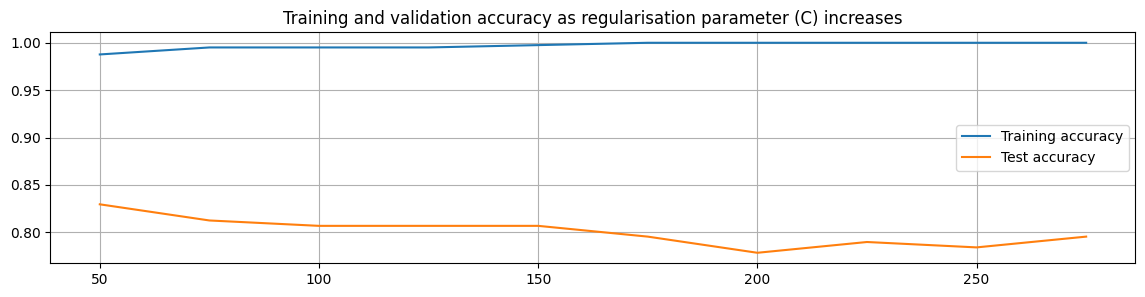

train accuracy    0.987685
test accuracy     0.829545
Name: 0, dtype: float64


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
Train_accuracy = []
Test_accuracy = []
ran = range(50,300,25)
for n in ran:
  model = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0, max_depth=1, random_state=0)
  model.fit(X_train_fn,Y_train)
  Train_accuracy.append(np.mean(model.predict(X_train_fn)==Y_train))
  Test_accuracy.append(np.mean(model.predict(X_test_fn)==Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(50,300,25)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(50,300,25)), Test_accuracy, label = "Test accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_gbc = ran[accuracy['test accuracy'].idxmax()]
accuracy_gbc = accuracy.loc[accuracy['test accuracy'].idxmax()]
print(accuracy_gbc)

As it can be seen the training accuracy isn't much affected by the number of estimators. But the test accuracy decreases as the number of estimators increase.

Training Accuracy:	 0.9975369458128078
Best Test  Accuracy:	 0.8409090909090909


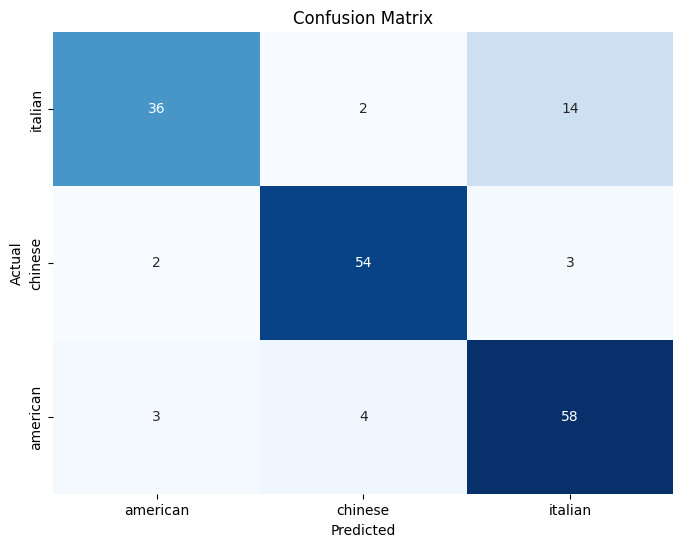

In [86]:
model_gbc = GradientBoostingClassifier(n_estimators=max_gbc, learning_rate=1.0, max_depth=1, random_state=0)
model_gbc.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_gbl = np.mean(ytp==Y_train)
test_accuracy_gbl  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_gbl)
print('Best Test  Accuracy:\t',test_accuracy_gbl)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=index_list)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM

for the SVM model we try to optimize the regularization parameter. In each step we fit a SVM to our data to choose the one with highest test accuracy.

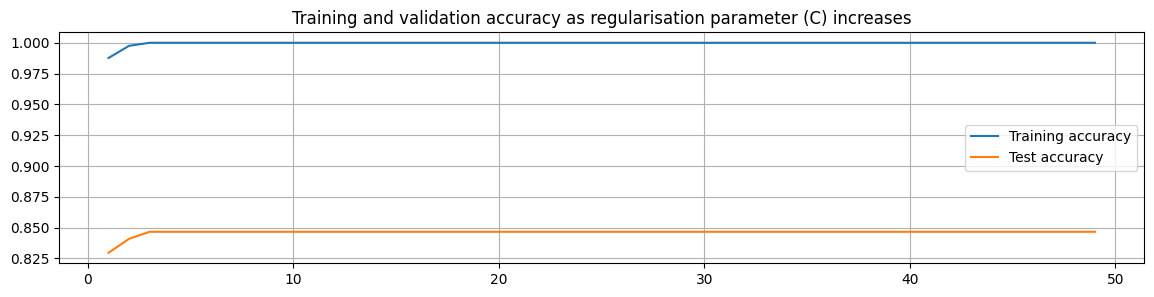

train accuracy    1.000000
test accuracy     0.846591
Name: 2, dtype: float64


In [70]:
from sklearn import svm
Train_accuracy = []
Test_accuracy = []
ran = range(1,50)
for n in ran:
    model = svm.SVC(C=n)
    model.fit(X_train_fn,Y_train)
    Train_accuracy.append(np.mean(model.predict(X_train_fn)==Y_train))
    Test_accuracy.append(np.mean(model.predict(X_test_fn)==Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Test_accuracy, label = "Test accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases')
plt.grid()
plt.show()

dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_svm = ran[accuracy['test accuracy'].idxmax()]
accuracy_svm = accuracy.loc[accuracy['test accuracy'].idxmax()]

print(accuracy_svm)

Training Accuracy:	 0.9975369458128078
Best Test  Accuracy:	 0.8409090909090909


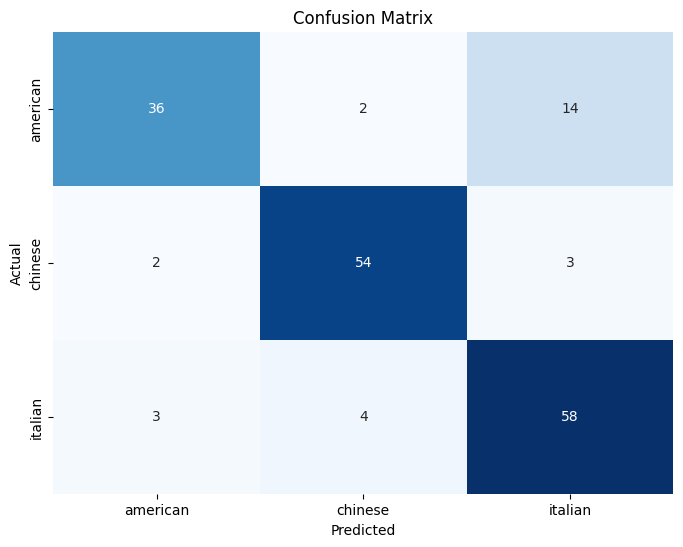

In [87]:
from sklearn import svm

model = svm.SVC(C=max_svm)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_svm = np.mean(ytp==Y_train)
test_accuracy_svm  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_svm)
print('Best Test  Accuracy:\t',test_accuracy_svm)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Just to make sure another SVM model with balanced class weights have been generated.

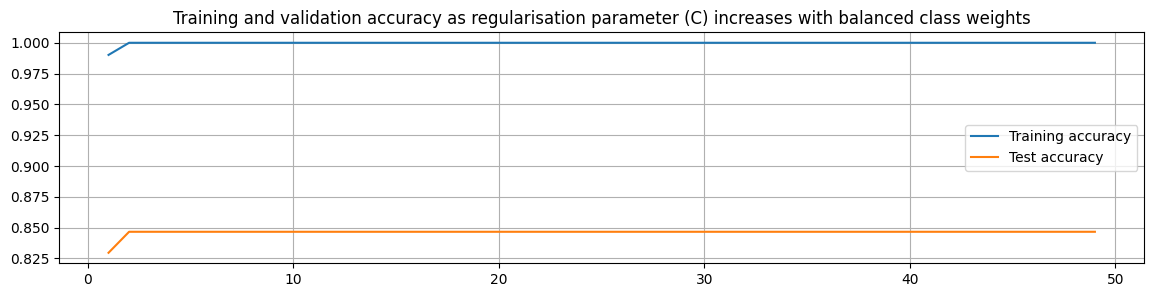

train accuracy    1.000000
test accuracy     0.846591
Name: 1, dtype: float64


In [72]:
from sklearn import svm
Train_accuracy = []
Test_accuracy = []
ran = range(1,50)
for n in ran:
    model = svm.SVC(C=n, class_weight='balanced')
    model.fit(X_train_fn,Y_train)
    Train_accuracy.append(np.mean(model.predict(X_train_fn)==Y_train))
    Test_accuracy.append(np.mean(model.predict(X_test_fn)==Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Test_accuracy, label = "Test accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases with balanced class weights')
plt.grid()
plt.show()

dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_svm = ran[accuracy['test accuracy'].idxmax()]
accuracy_svm = accuracy.loc[accuracy['test accuracy'].idxmax()]

print(accuracy_svm)

Training Accuracy:	 1.0
Best Test  Accuracy:	 0.8465909090909091


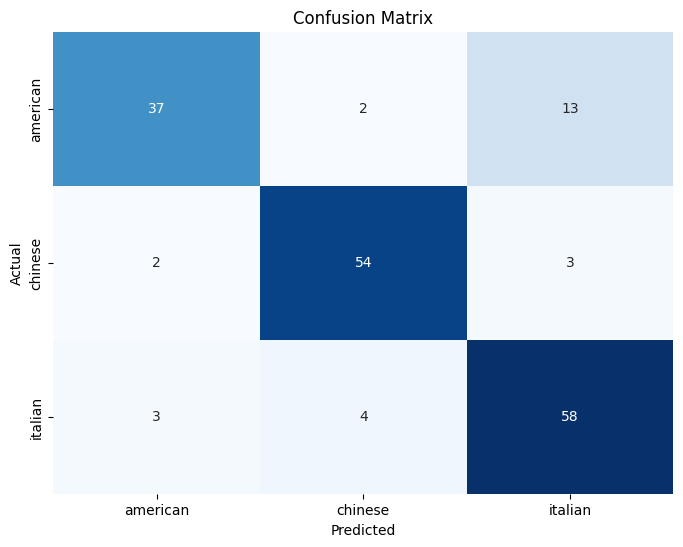

In [88]:
from sklearn import svm
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = svm.SVC(C=max_svm, class_weight='balanced')
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_bsvm = np.mean(ytp==Y_train)
test_accuracy_bsvm  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_bsvm)
print('Best Test  Accuracy:\t',test_accuracy_bsvm)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As it can be interpreted from the accuracies of the last two, we can understand that this dataset isn't skewed because the result of these two models don't differ much.

### Decision trees

Training Accuracy:	 1.0
Test  Accuracy:	 0.7840909090909091


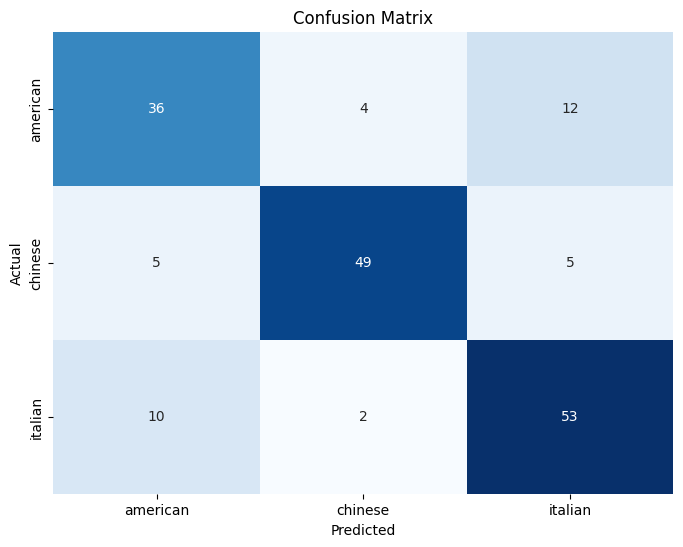

In [74]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_tree = np.mean(ytp==Y_train)
test_accuracy_tree  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_tree)
print('Test  Accuracy:\t',test_accuracy_tree)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Linear Support Vector Classification

Training Accuracy:	 0.9975369458128078
Test  Accuracy:	 0.8409090909090909


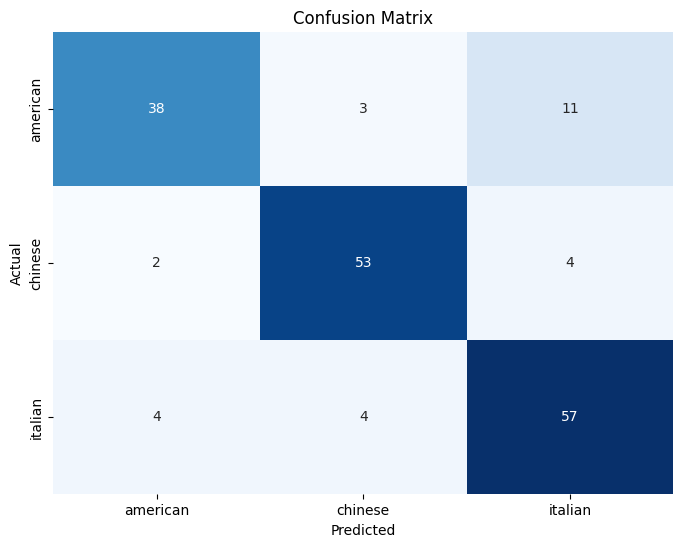

In [75]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_lsvc = np.mean(ytp==Y_train)
test_accuracy_lsvc  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_lsvc)
print('Best Test  Accuracy:\t',test_accuracy_lsvc)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random forest classifier

for this model the number of estimators will be optimized

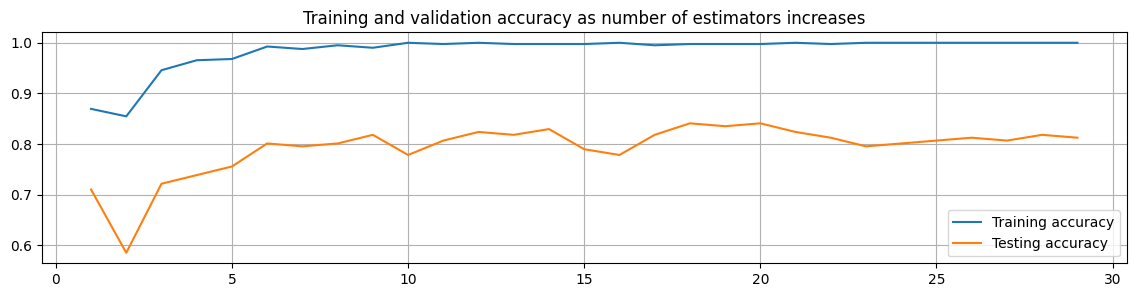

train accuracy    0.997537
test accuracy     0.840909
Name: 17, dtype: float64


In [90]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
Train_accuracy = []
Test_accuracy = []
ran = range(1,30)
for n in ran:

  rfc = RandomForestClassifier(n_estimators=n)
  rfc.fit(X_train_fn, Y_train)

  Train_accuracy.append(np.mean(rfc.predict(X_train_fn)==Y_train))
  Test_accuracy.append(np.mean(rfc.predict(X_test_fn)==Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of estimators increases')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_rfc = ran[accuracy['test accuracy'].idxmax()]
accuracy_rfc = accuracy.loc[accuracy['test accuracy'].idxmax()]
print(accuracy_rfc)

Training Accuracy:	 0.9975369458128078
Best Test  Accuracy:	 0.8352272727272727


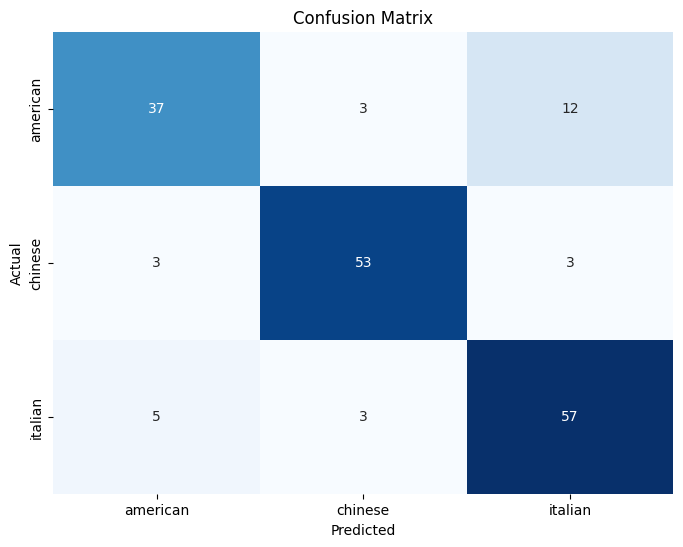

In [91]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=max_rfc)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_rfc = np.mean(ytp==Y_train)
test_accuracy_rfc  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_rfc)
print('Best Test  Accuracy:\t',test_accuracy_rfc)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

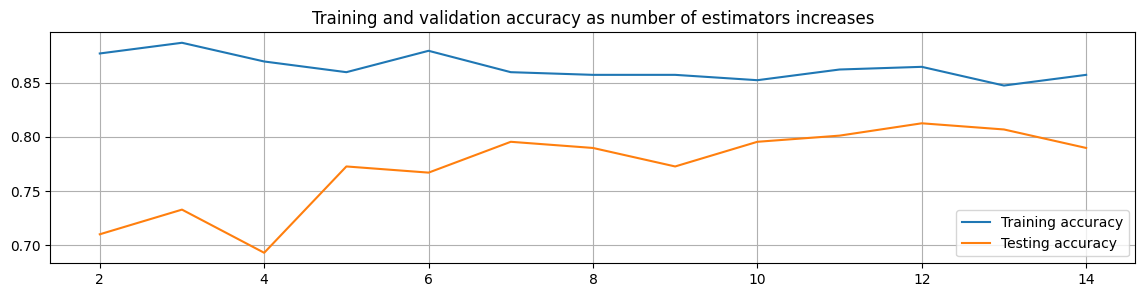

train accuracy    0.864532
test accuracy     0.812500
Name: 10, dtype: float64


In [78]:
from sklearn.neighbors import KNeighborsClassifier

Train_accuracy = []
Test_accuracy = []
ran = range(2,15)
for n in ran:
  knn = KNeighborsClassifier(n_neighbors= n)
  knn.fit(X_train_fn, Y_train)
  Train_accuracy.append(np.mean(knn.predict(X_train_fn)==Y_train))
  Test_accuracy.append(np.mean(knn.predict(X_test_fn)==Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(2,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(2,n+1)), Test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of estimators increases')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_knn = ran[accuracy['test accuracy'].idxmax()]
accuracy_knn = accuracy.loc[accuracy['test accuracy'].idxmax()]
print(accuracy_knn)

Training Accuracy:	 0.8645320197044335
Best Test  Accuracy:	 0.8125


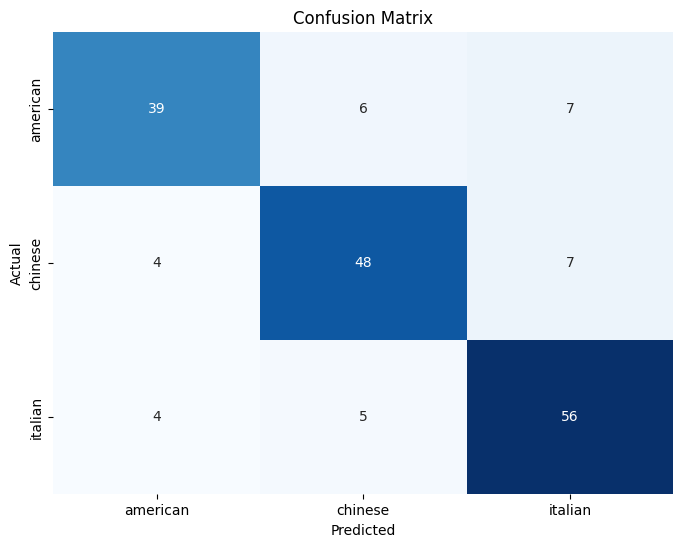

In [92]:
model = KNeighborsClassifier(n_neighbors=max_knn)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_knn = np.mean(ytp==Y_train)
test_accuracy_knn  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_knn)
print('Best Test  Accuracy:\t',test_accuracy_knn)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic regression

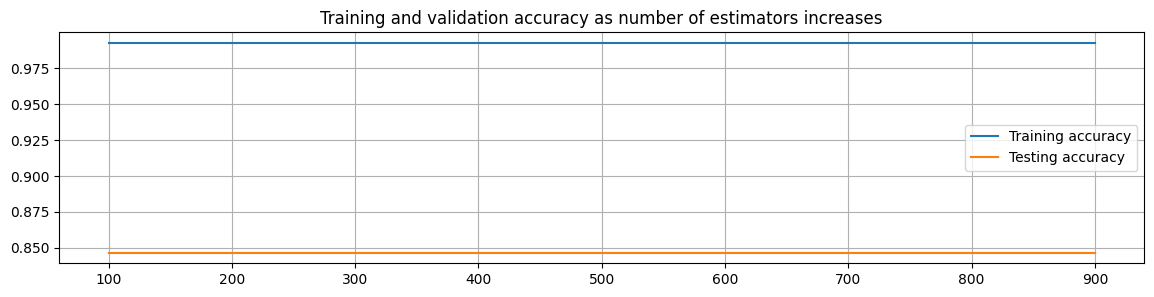

train accuracy    0.992611
test accuracy     0.846591
Name: 0, dtype: float64


In [93]:
from sklearn.linear_model import LogisticRegression

Train_accuracy = []
Test_accuracy = []
ran = range(100,1000,100)
for n in ran:
  lr = LogisticRegression(max_iter= n)
  lr.fit(X_train_fn, Y_train)
  Train_accuracy.append(np.mean(lr.predict(X_train_fn)==Y_train))
  Test_accuracy.append(np.mean(lr.predict(X_test_fn)==Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(ran), Train_accuracy, label = "Training accuracy")
plt.plot(list(ran), Test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of estimators increases')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_lr = ran[accuracy['test accuracy'].idxmax()]
accuracy_lr = accuracy.loc[accuracy['test accuracy'].idxmax()]
print(accuracy_lr)

Training Accuracy:	 0.9926108374384236
best Test  Accuracy:	 0.8465909090909091


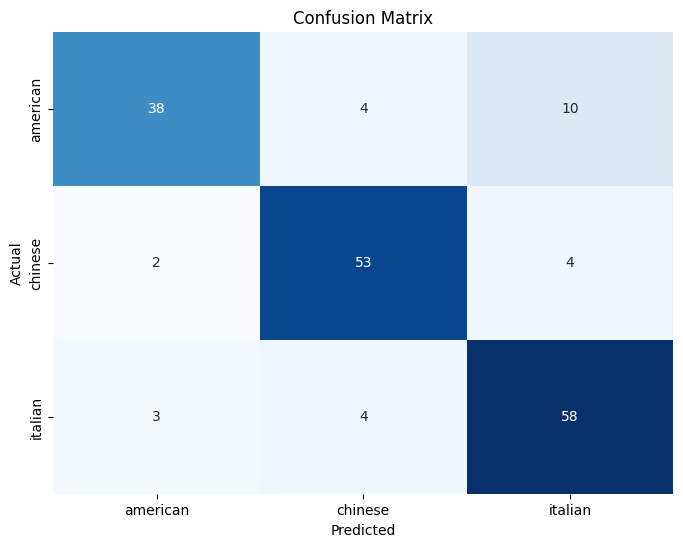

In [94]:
model = LogisticRegression(max_iter=max_lr)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy_lr = np.mean(ytp==Y_train)
test_accuracy_lr  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy_lr)
print('best Test  Accuracy:\t',test_accuracy_lr)

cm = confusion_matrix(Y_test, ysp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['american', 'chinese', 'italian'], yticklabels=['american', 'chinese', 'italian'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9 Conclusions

**Your conclusions, suggestions for improvements, etc should go here**

Table below shows the best validation accuracy achieved by each model:



- As it is obvious from the training and test accuracies, in complex models, the model overfits the training dataset. That is why even thouh gradient boosting learning, svm, logistic regression, linear SVC, and random forest have high test accuracies, due to their train accuracy they can't be reliable and K nearest neighbors will be chosen as the final model.

- For improving the results of this model, more data can be used to train it.

In [95]:
acc = pd.DataFrame([('Gradient boosting tree', test_accuracy_gbl, train_accuracy_gbl),
                    ('SVM', test_accuracy_svm, train_accuracy_svm),
                    ('Balanced SVM', test_accuracy_bsvm, train_accuracy_bsvm),
                    ('Linear SVC', test_accuracy_lsvc, train_accuracy_lsvc),
                    ('Random forest classifier', test_accuracy_rfc, train_accuracy_rfc),
                    ('K nearest neighbors', test_accuracy_knn, train_accuracy_knn),
                    ('Logistic Regression', test_accuracy_lr, train_accuracy_lr)], columns=['model', 'best test accuracy', 'best train_accuracy'])
acc

,model,best test accuracy,best train_accuracy
0,Gradient boosting tree,0.840909,0.997537
1,SVM,0.840909,0.997537
2,Balanced SVM,0.846591,1.000000
3,Linear SVC,0.840909,0.997537
4,Random forest classifier,0.835227,0.997537
5,K nearest neighbors,0.812500,0.864532
6,Logistic Regression,0.846591,0.992611


In [96]:
ingred = ['salt','chicken','fries','rice']
final_model = knn
cuisine_predict(ingred, final_model)

The possible diet for this dish is american
